<img src="car.jpeg" />

<center> <h1 Style="color:#FF1493">Analisis de datos</h1></center>
<center> <h5 Style="color:#9400D3">Universidad Castro Carazo</h5></center>
<center> <h6 Style="color:#FF1550">1C-2023</h6></center>
</br>
<p Style="text-align: justify">Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa se encuentra interesada en responder una pregunta de negocio particular.Como se puede incrementar las ventas de autos de segunda mano?Para esto se realiza un analisis del conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento sobre las ditribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, esto para dotar de insumos suficientes a la toma de desiciones</p>
</br>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile">Fuente de datos para el poceso de analisis</a>

<h2 Style="color:#FF69B4">1.Cargar y estandarizar los set de datos</h2>
</br>
<p> Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Importar las librerias de Python necesarias</li>
    <li>importar el o los set de datos</li>
    <li>Revisar los encabezados de los DataFrames</li>
    <li>Si solo si tenemos mas de 1 set de datos los vinculamos en uno solo</li>
</ol>

<h3 Style="color:#1E90FF">1.1)Importar las librerias de Python necesarias </h3>

In [1]:
import pandas as pd #Se usa para el manejo de grandes volumenes de datos - DataFrame
import numpy as np #Se usa para el manejo de estructuras de datos: Tuplas, listas, Diccionario
import matplotlib.pyplot as plt #Permite crear graficos.

<h3 Style="color:#1E90FF" >1.2)Importar las librerias de Python necesarias </h3>

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]
#esto es en caso de que tengamos que escribir los encabezados, si ya el documento los trae no es necesario.

df_1er_set=pd.read_csv("autos.csv", names=cols) #esta variable me va a guardar toda la informacion del archivo csv.
df_2do_set=pd.read_csv("Autos1.csv", names=cols)


In [3]:
df_1er_set.head(5) #esto es para tener una visualizacion premliminar

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df_2do_set.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989
2,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11199
3,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,11549
4,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669


In [5]:
df_1er_set.shape #como hago para saber cuanta data tengo en los sets

(197, 26)

In [6]:
df_2do_set.shape

(29, 26)

In [7]:
df_1er_set.tail(5)#para ver los ultimos 5 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [8]:
df_2do_set.tail(5)#para ver los ultimos 5 registros

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
28,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [9]:
df_1er_set.describe() #para ver datos numericos los puedo visualizar por medio de una estadistica descriptiva

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:
df_1er_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

<h3 Style ="color:#1E90FF"> 1.3Revisar los encabezados de los DataFrame </h3>
<p> Se motiva la estandarizacion de os nombres de las columnas, considerando lo siguiente:
</p>

<ol>
    <li>Los nombres de las columna no deben tener espacios en blanco </li>
    <li>No deben emoezar por numeros</li>
    <li>Si el nombre tiene dos palabras ambas deben iniciar con mayuscula</li>
    <li>No deben existir nombres repetidos</li>
</ol>


In [11]:
df_1er_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [12]:
df_2do_set.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [13]:
df_1er_set.rename({'engine-size':'engineSize'},axis=1,inplace=True)
df_2do_set.rename({'engine-size':'engineSize'},axis=1,inplace=True)
df_2do_set.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,2,134,toyota,gas,std,two,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9639
1,2,134,toyota,gas,std,two,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,9989


<h3 Style ="color:#1E90FF"> 1.4 Unir los set de datos </h3>

In [14]:
unionArchivos=[df_1er_set, df_2do_set] #tupla parentesis cuadrado, lista prentesis redondo
dfAutos=pd.concat(unionArchivos)
dfAutos.shape

(226, 26)

In [15]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h2 Style="color:#FF69B4">2.Manejo de los valores faltantes o missing values</h2>
</br>
<p> Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Identificar como se muestran los valores faltantes y estandarizarlos a NaN (forma estandar de como se representan valores faltantes)</li>
    <li>Contar la cantidad de valores faltantes por variables</li>
    <li>Analizar la imputacion de valores numericos(con la media)</li>
    <li>Analizar la imputacion de valores categoricos(con valors mas frecuentes)</li>
    <li>Eliminar filas con valores faltantes</li>
</ol>

<h3 Style="color:#1E90FF">2.1)Identificar como se muestran los valores faltantes </h3>

In [16]:
dfAutos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [17]:
dfAutos.replace("?",np.nan, inplace=True)
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 Style="color:#1E90FF">2.1Contar la cantidad de valores faltantes por variable </h3>

In [18]:
dfValoresFaltantes=dfAutos.isnull()
dfValoresFaltantes.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engineSize
False    226
Name: engineSize, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       

#normalized-int
#bore-float
#stroke-float
#horsepower-int
#peak-int
#price-float
#doors-caracter

<h3 Style="color:#1E90FF"> 2.1Analizar la imputacion de valores numericos </h3>

In [20]:
mean_value=dfAutos["normalized"].astype('float').mean(axis=0)
print("La media de normalized es: ",mean_value)

La media de normalized es:  122.28333333333333


In [21]:
mean_value=dfAutos["bore"].astype('float').mean(axis=0)
print("La media de bore es: ",mean_value)

La media de bore es:  3.319459459459461


In [22]:
mean_value=dfAutos["stroke"].astype('float').mean(axis=0)
print("La media de stroke es: ",mean_value)

La media de stroke es:  3.2785135135135075


In [23]:
mean_value=dfAutos["horsepower"].astype('float').mean(axis=0)
print("La media de horsepower es: ",mean_value)

La media de horsepower es:  102.98214285714286


In [24]:
mean_value=dfAutos["peak"].astype('float').mean(axis=0)
print("La media de peak es: ",mean_value)

La media de peak es:  5100.892857142857


In [25]:
dfAutos["normalized"].replace(np.nan,122,inplace=True)
dfAutos["bore"].replace(np.nan,3.31,inplace=True)
dfAutos["stroke"].replace(np.nan,3.27,inplace=True)
dfAutos["horsepower"].replace(np.nan,102,inplace=True)
dfAutos["peak"].replace(np.nan,5100,inplace=True)
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


<h3 Style="color:#1E90FF">2.4Analizar la imputacion de valores caracter con el dato mas frecuente </h3>

In [26]:
dfAutos['doors'].value_counts().idxmax()

'four'

In [27]:
dfAutos["doors"].replace(np.nan,"four",inplace=True)
dfAutos.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


<h3 Style="color:#1E90FF">2.5 Eliminar filas con valores faltantes (esto es de mucho cuidado) </h3>

In [28]:
dfAutos.dropna(subset=['price'],axis=0,inplace=True)
#cuando se borra un row queda un salto, eg. 19 20 21 si borramos el 20 queda 19 21, para que me resetee los rows para que queden consecutivos hago:
dfAutos.reset_index(drop=True,inplace=True)


In [29]:
dfValoresFaltantes=dfAutos.isnull()
for column in dfValoresFaltantes.columns.values.tolist():
    print(column)
    print(dfValoresFaltantes[column].value_counts())
    print("")


symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

Cylinders
False    222
Name: Cylinders, dtype: int64

engineSize
False    222
Name: engineSize, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    222
Name: bore, dtype: int64

stroke
False    222
Name: stroke, dtype: int64

compression
False    2

<h2 Style="color:#FF69B4">3.Estandarizacion de los datos</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Varificar el dominio de cada variable y se ajuta si es necesario</li>
    <li>Se convierten los valores en funcion de su interpretacion</li>
    <li>Se normalizan los datos para que los valores queden entre 0 y 1</li>
    <li>Crear los binning, categorias pra el resumen de datos</li>
</ol>

<h3 Style = "color:#1E90FF">3.1)Verificar los dominios de variables </h3>

In [30]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [31]:
dfAutos.dtypes #me tira una lista que me permite identificar en que valor esta cada una de las variables del documento

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [32]:
dfAutos[["normalized"]]=dfAutos[["normalized"]].astype("int")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [34]:
dfAutos[["bore","stroke","peak","price"]]=dfAutos[["bore","stroke","peak","price"]].astype("float")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

In [35]:
dfAutos[["horsepower"]]=dfAutos[["horsepower"]].astype("int")
dfAutos.dtypes

symboling        int64
normalized       int32
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engineSize       int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower       int32
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

<h3 Style = "color:#1E90FF">3.2)Se convierten los valores en funcion de su interpretacion </h3>

In [36]:
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engineSize,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0


In [39]:
dfAutos["City L/100km"]=235/dfAutos["City"]
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421


In [40]:
dfAutos["Higway L/100km"]=235/dfAutos["Higway"]
dfAutos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462


<h3 Style = "color:#1E90FF">3.3)Se normalizan los datos para que los valores queden entre 0 y 1 </h3>

In [41]:
dfAutos.head(4)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333


In [43]:
dfTemp=dfAutos[["length","width","heingt"]] #esto es para traer data temporal, solo como para revisar
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [46]:
#tecnica para comparar valores que no son comparables en primera instancia:
#ej: agarrar la longitud y deicrle a Python: agarreme este valor (168.8) y me lo divide por el valor mas alto que esta registrado en esa misma columna.ej(176)
#entonces divide 168.8 entre 176.6, esto me dice que le valor es 0.95
#entonces eso es lo que se hace: se divide cada valor por el numero mayor de la columna
dfAutos["lengthnorm"]=dfAutos["length"]/dfAutos["length"].max()
dfAutos["widthnorm"]=dfAutos["width"]/dfAutos["width"].max()
dfAutos["heingtnorm"]=dfAutos["heingt"]/dfAutos["heingt"].max()

dfTemp=dfAutos[["lengthnorm","widthnorm","heingtnorm"]]
dfTemp.head(5)

,lengthnorm,widthnorm,heingtnorm
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [47]:
dfAutos.head(3) #para ver como se ven las columnas que cree, es importante no reemplazar 

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km,lengthnorm,widthnorm,heingtnorm
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254


<h3 Style = "color:#1E90FF">3.4)Crear los binning, categorias pra el resumen de datos </h3>

In [48]:
dfTemp=dfAutos[["horsepower"]] #esto es para traer data temporal, solo como para revisar
dfTemp.head(5)

,horsepower
0,111
1,111
2,154
3,102
4,115


In [50]:
bins=np.linspace(min(dfAutos["horsepower"]),max(dfAutos["horsepower"]),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [51]:
dfAutos.describe()

,symboling,normalized,base,length,width,heingt,curb,engineSize,bore,stroke,...,horsepower,peak,City,Higway,price,City L/100km,Higway L/100km,lengthnorm,widthnorm,heingtnorm
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.909910,122.229730,98.661261,174.064865,65.836036,53.766667,2540.418919,126.450450,3.319955,3.280090,...,102.180180,5093.468468,25.445946,30.990991,12780.941441,9.803749,7.947735,0.836448,0.914389,0.899108
std,1.280198,33.651614,5.648067,11.720591,1.970382,2.367974,494.544729,40.226562,0.258981,0.305005,...,36.334344,481.973832,6.272417,6.701787,7530.446820,2.441520,1.783939,0.056322,0.027366,0.039598
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.678039,0.837500,0.799331
25%,0.000000,101.000000,94.500000,167.350000,64.200000,52.000000,2209.000000,98.000000,3.150000,3.150000,...,70.000000,4800.000000,20.250000,25.000000,7898.000000,7.833333,6.911765,0.804181,0.891667,0.869565
50%,1.000000,122.000000,97.250000,173.200000,65.500000,54.100000,2414.000000,115.000000,3.310000,3.350000,...,95.000000,5100.000000,25.000000,30.000000,10221.500000,9.400000,7.833333,0.832292,0.909722,0.904682
75%,2.000000,136.250000,102.300000,180.200000,66.500000,55.675000,2841.250000,146.000000,3.580000,3.447500,...,116.000000,5500.000000,30.000000,34.000000,15628.750000,11.610119,9.400000,0.865930,0.923611,0.931020
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000


In [55]:
groupNames=["Pequeño","Mediano","Grande"] #se tiene que poner en orden
dfAutos["horsepowerBins"]=pd.cut(dfAutos["horsepower"],bins,labels=groupNames,include_lowest=True)
dfAutos[["horsepower","horsepowerBins"]].head(5)

,horsepower,horsepowerBins
0,111,Pequeño
1,111,Pequeño
2,154,Mediano
3,102,Pequeño
4,115,Pequeño


In [56]:
dfAutos["horsepowerBins"].value_counts()

Pequeño    174
Mediano     43
Grande       5
Name: horsepowerBins, dtype: int64

Text(0.5, 1.0, 'Cantidad de carros segun los caballos de fuerza')

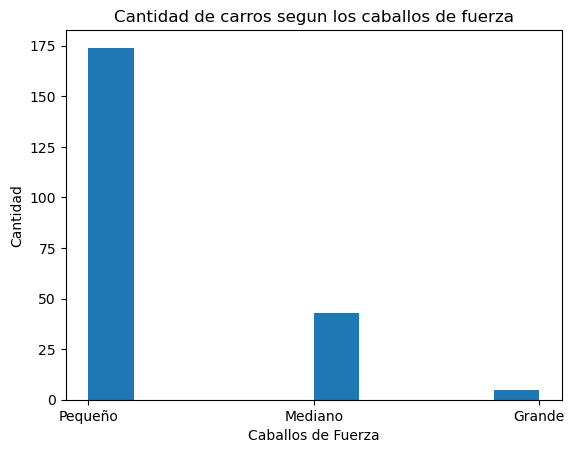

In [58]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(dfAutos["horsepowerBins"])

plt.pyplot.xlabel("Caballos de Fuerza")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Cantidad de carros segun los caballos de fuerza")


In [59]:
dfAutos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,City,Higway,price,City L/100km,Higway L/100km,lengthnorm,widthnorm,heingtnorm,horsepowerbins,horsepowerBins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054,Pequeño,Pequeño
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054,Pequeño,Pequeño
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254,Mediano,Mediano
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027,Pequeño,Pequeño
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027,Pequeño,Pequeño
